# Exploratory Data Analysis

## Part 1: Global emissions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
global_emissions = pd.read_csv("./datasets/historical_emissions.csv")

**1. Displaying raw data**

In [62]:
global_emissions

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Total excluding LUCF,All GHG,MtCO₂e,97.36,95.41,93.76,84.62,74.80,...,16.91,16.10,15.34,14.44,13.49,13.29,13.48,13.65,15.12,15.20
1,Afghanistan,CAIT,Total including LUCF,All GHG,MtCO₂e,97.36,95.41,93.76,84.62,74.80,...,16.91,16.10,15.34,14.44,13.49,13.29,13.48,13.65,15.12,15.20
2,Afghanistan,CAIT,Energy,All GHG,MtCO₂e,77.72,75.93,74.74,64.68,55.53,...,2.10,2.39,2.51,2.65,2.78,3.10,3.42,3.76,5.33,5.83
3,Afghanistan,CAIT,Industrial Processes,All GHG,MtCO₂e,0.91,0.76,0.59,0.53,0.45,...,0.12,0.11,0.10,0.08,0.07,0.07,0.06,0.06,0.05,0.05
4,Afghanistan,CAIT,Agriculture,All GHG,MtCO₂e,15.28,15.35,15.15,16.22,15.73,...,12.79,11.75,10.95,9.98,8.97,8.54,8.50,8.42,8.41,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Zimbabwe,CAIT,Manufacturing/Construction,All GHG,MtCO₂e,1.12,1.09,1.09,1.07,1.05,...,3.10,2.39,2.28,2.50,2.63,2.40,3.87,4.60,4.99,4.74
2704,Zimbabwe,CAIT,Transportation,All GHG,MtCO₂e,2.24,2.18,2.57,2.64,2.93,...,3.13,2.12,2.14,2.14,2.17,1.75,1.97,2.21,1.59,2.10
2705,Zimbabwe,CAIT,Building,All GHG,MtCO₂e,0.22,0.23,0.22,0.19,0.17,...,0.86,0.60,0.72,0.70,0.80,0.73,0.88,0.89,0.99,0.97
2706,Zimbabwe,CAIT,Other Fuel Combustion,All GHG,MtCO₂e,4.00,3.98,4.06,3.89,3.72,...,5.20,5.09,4.99,5.08,4.63,4.67,4.39,4.03,4.09,3.86


**2. Removing unecessary columns**

Some columns won't be useful for our analysis. Indeed, we are interested in the most recent emissions statistics.


In [4]:
print(global_emissions['Data source'].unique())
print(global_emissions['Gas'].unique())
print(global_emissions['Unit'].unique())

['CAIT']
['All GHG']
['MtCO₂e']


In [5]:
global_emissions_filtered = global_emissions[['Country', 'Sector', '2017']]

In [6]:
global_emissions_filtered.head(14)

,Country,Sector,2017
0,Afghanistan,Total excluding LUCF,97.36
1,Afghanistan,Total including LUCF,97.36
2,Afghanistan,Energy,77.72
3,Afghanistan,Industrial Processes,0.91
4,Afghanistan,Agriculture,15.28
5,Afghanistan,Waste,3.45
6,Afghanistan,Land-Use Change and Forestry,0.00
7,Afghanistan,Bunker Fuels,0.04
8,Afghanistan,Electricity/Heat,0.21
9,Afghanistan,Manufacturing/Construction,3.44


In [7]:
# Let's see if we have all the sectors displayed.
print(global_emissions_filtered['Sector'].unique())

['Total excluding LUCF' 'Total including LUCF' 'Energy'
 'Industrial Processes' 'Agriculture' 'Waste'
 'Land-Use Change and Forestry' 'Bunker Fuels' 'Electricity/Heat'
 'Manufacturing/Construction' 'Transportation' 'Building'
 'Other Fuel Combustion' 'Fugitive Emissions']


In order to reduce the complexity of the dataset, we are going to use only 6 sectors:

Here are the sectors provided in this dataset and how they are computed:
"Main IPCC sectors, including energy sub-sectors. Includes:
- agriculture
- bunker fuels
- energy (sums of)
    - electricity/heat
    - fugitive emissions
    - manufacturing/construction
    - building
    - other fuel combustion
    - transportation
- industrial processes
- land-use change and forestry
- waste


We will make 4 sectors from the above one to reduce the complexity:
- electricity/energy (electricity/heat + building)
- industry (industrial processes + manufacturing/construction + fugitive emissions)
- transport (transportation + bunker fuels - used in boats -)
- agriculture and food (agriculture + land-use change and forestry + waste)
- other (other fuel combustion)

We will also remove the sectors that are sums of others (totals and energy)

In [17]:
data = {}
from collections import defaultdict

for index, row in global_emissions_filtered.iterrows():
    
    if row['Country'] not in data:
        data[row['Country']] = defaultdict(lambda:0)
    
    country_data = data[row['Country']]
    
    country_data[row['Sector']] = row['2017']
    
    
rows = []

for key, val in data.items():
    
    country_data = []
    country_data.append(key)
    
    energy = val['Electricity/Heat'] + val['Building']
    industry = val['Industrial Processes'] + val['Manufacturing/Construction'] + val['Fugitive Emissions']
    transport = val['Transportation'] + val['Bunker Fuels']
    agriculture = val['Agriculture'] + val['Land-Use Change and Forestry'] + val['Waste']
    other =  val['Other Fuel Combustion']
    
    country_data.append(energy)
    country_data.append(industry)
    country_data.append(transport)
    country_data.append(agriculture)
    country_data.append(other)
    
    rows.append(country_data)

In [18]:
df = pd.DataFrame(rows, columns=['Country', 'Energy', 'Industry', 'Transport', 'Agriculture', 'Other'])
df

,Country,Energy,Industry,Transport,Agriculture,Other
0,Afghanistan,0.34,6.56,3.59,18.73,68.18
1,Albania,0.68,2.60,2.50,3.72,0.60
2,Algeria,70.49,65.33,46.22,26.15,4.85
3,Andorra,0.00,0.07,0.00,0.03,0.00
4,Angola,10.74,30.85,7.70,127.72,0.83
...,...,...,...,...,...,...
190,Vietnam,87.35,119.38,42.23,70.42,4.19
191,World,17963.37,11776.29,9080.00,10685.90,1443.42
192,Yemen,4.97,2.90,2.69,10.76,0.87
193,Zambia,2.01,3.22,2.25,484.22,4.50


**3. Analysis**

We can now analyse this dataset.
For each sector we have the MtCo2e (Million tons of carbon dioxide equivalent) for all GHB (green house gas) gases.

We will first show a ranking of country and then find which sector contributes the most to emissions.

In [19]:
df['Total'] = df['Energy'] + df['Industry'] + df['Transport'] + df['Agriculture'] + df['Other']

In [20]:
df

,Country,Energy,Industry,Transport,Agriculture,Other,Total
0,Afghanistan,0.34,6.56,3.59,18.73,68.18,97.40
1,Albania,0.68,2.60,2.50,3.72,0.60,10.10
2,Algeria,70.49,65.33,46.22,26.15,4.85,213.04
3,Andorra,0.00,0.07,0.00,0.03,0.00,0.10
4,Angola,10.74,30.85,7.70,127.72,0.83,177.84
...,...,...,...,...,...,...,...
190,Vietnam,87.35,119.38,42.23,70.42,4.19,323.57
191,World,17963.37,11776.29,9080.00,10685.90,1443.42,50948.98
192,Yemen,4.97,2.90,2.69,10.76,0.87,22.19
193,Zambia,2.01,3.22,2.25,484.22,4.50,496.20


In [21]:
result = df.sort_values(['Total'], ascending = False)[['Country', 'Total']].head(50)

In [22]:
result.head(20)

,Country,Total
191,World,50948.98
35,China,11924.05
185,United States,5886.61
77,India,3402.29
58,European Union (27),3369.81
143,Russia,2489.00
78,Indonesia,2287.16
23,Brazil,1418.56
85,Japan,1270.49
79,Iran,896.04


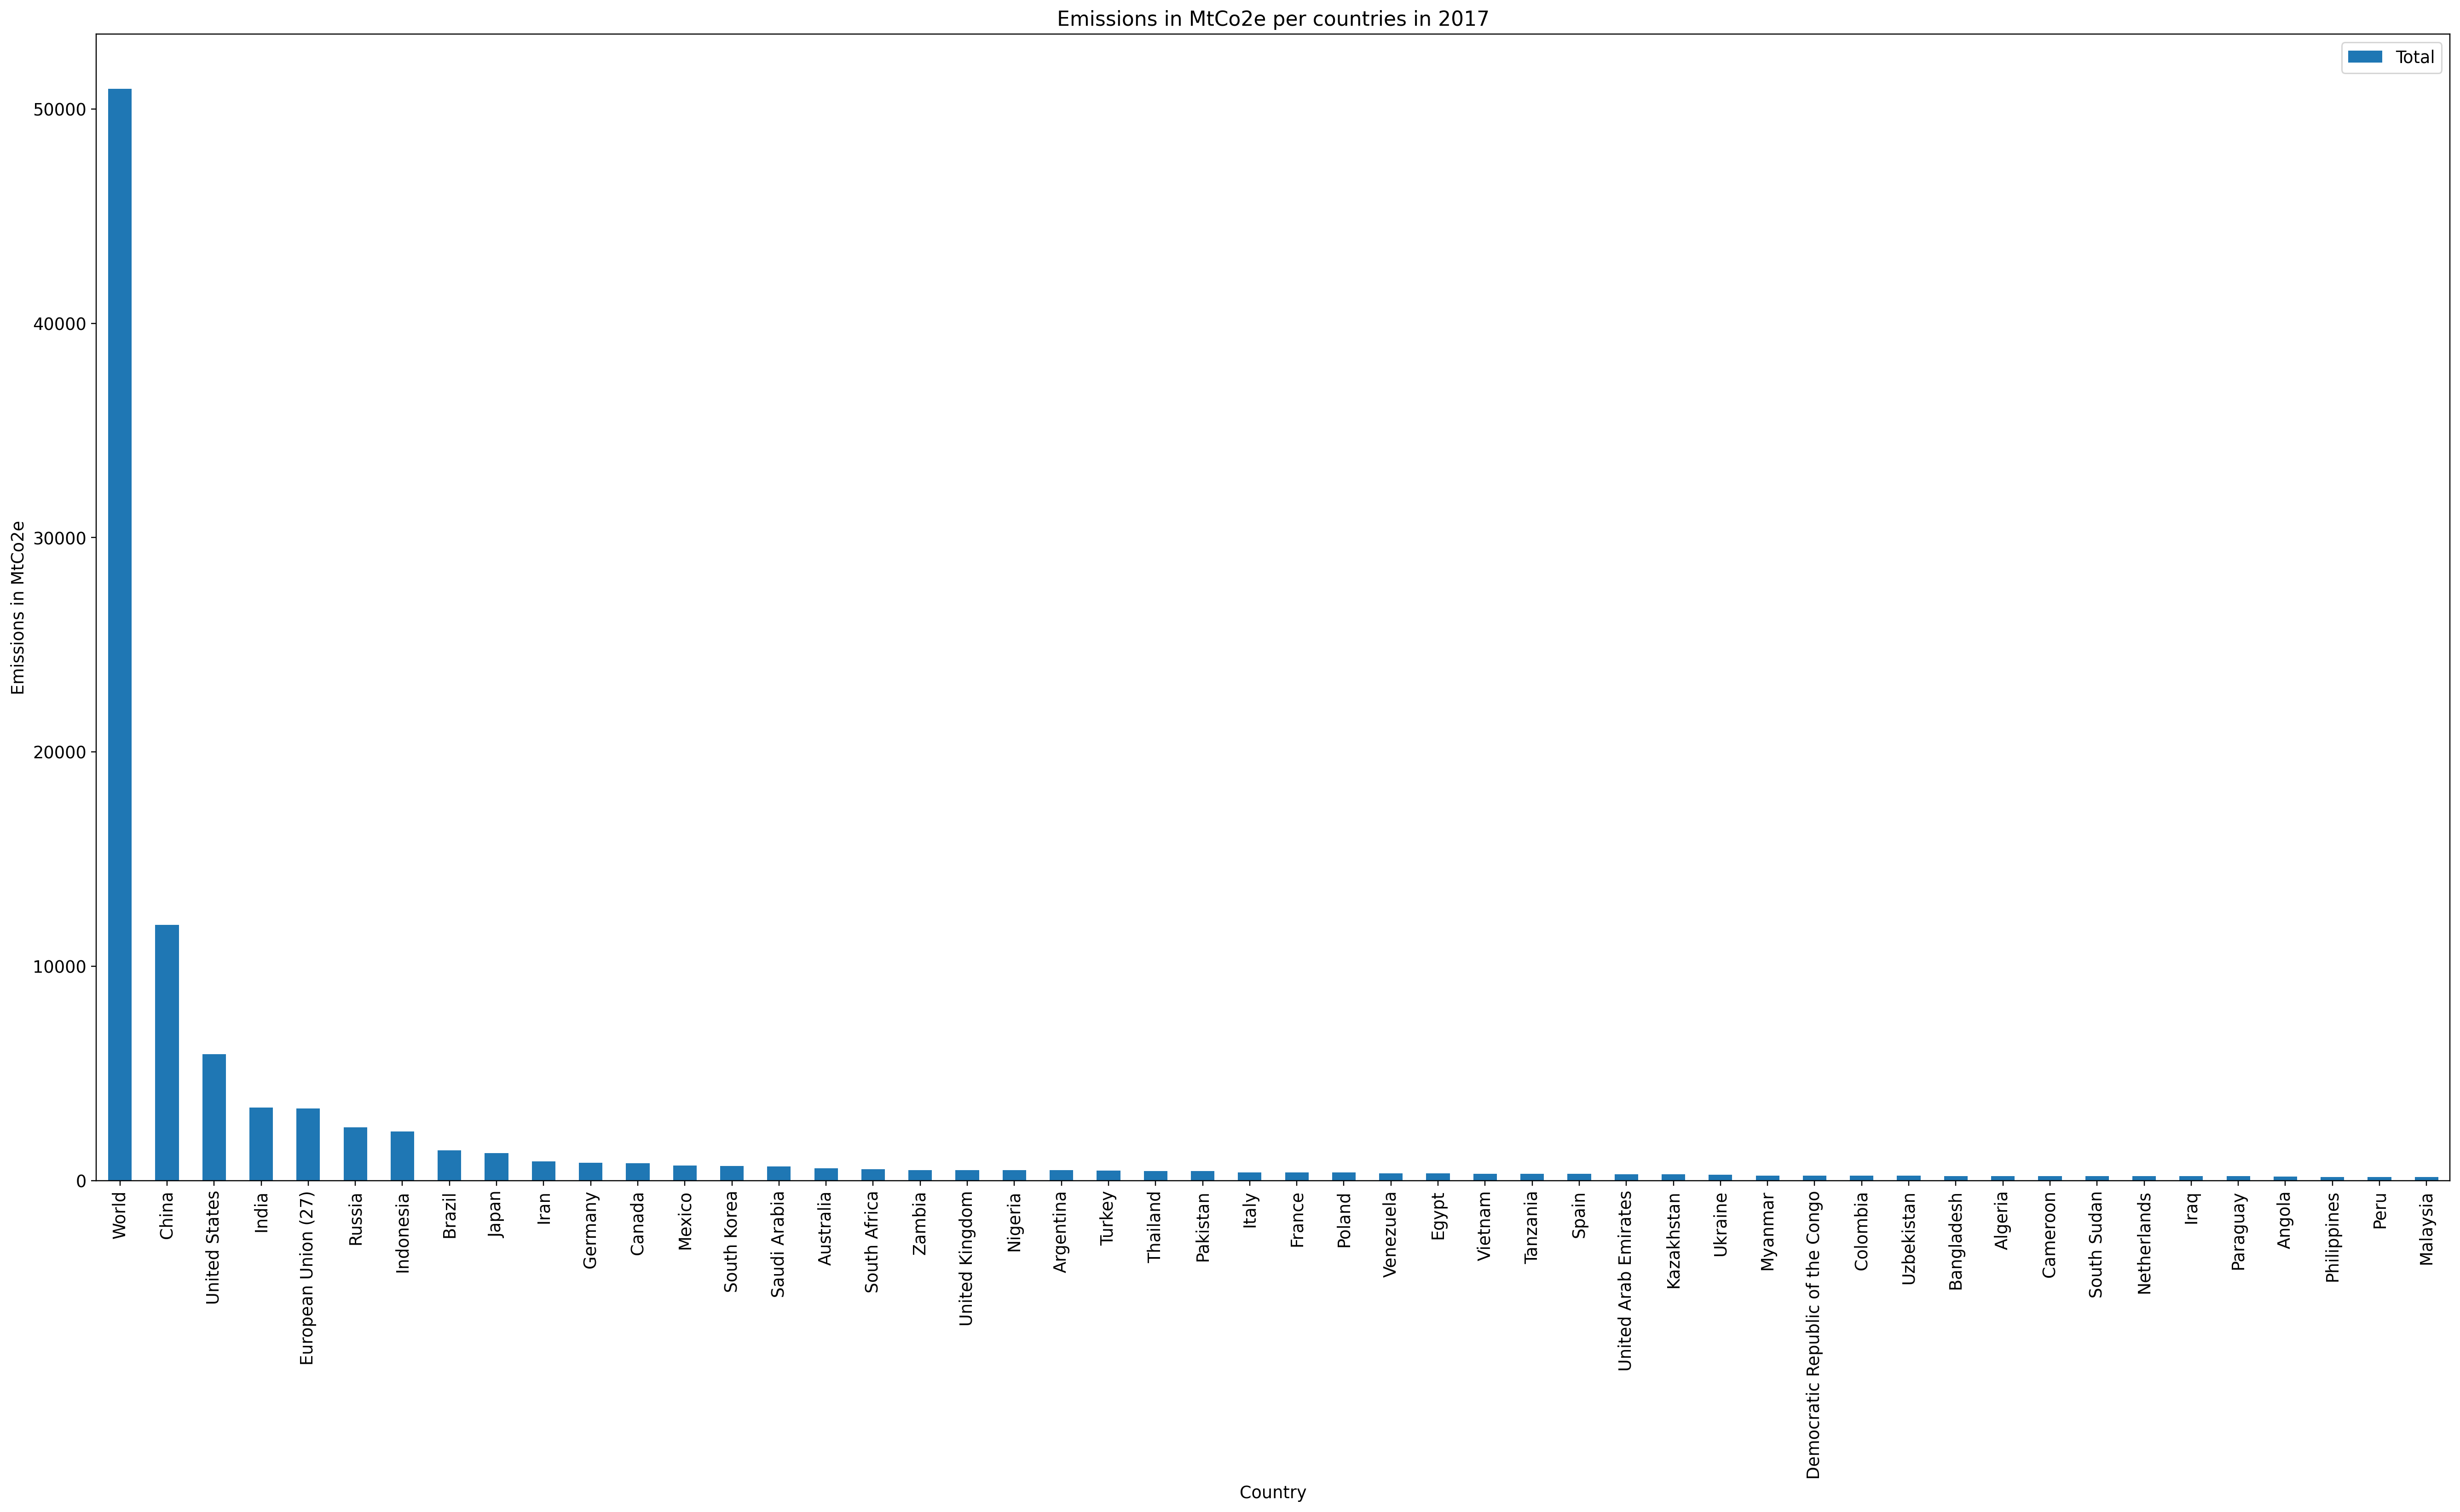

In [48]:
fig = plt.figure(dpi=220)
plt.title("Emissions in MtCo2e per countries in 2017")
plt.rcParams.update({'font.size': 12})
plt.ylabel("Emissions in MtCo2e")
ax = result.plot.bar(x = 'Country', y ='Total', rot = 90, figsize=(30,15), ax=plt.gca())

We can see that the world emitted 51 billion tons of Co2 equivalent gases in 2017.

Let's now look at sectors.

In [25]:
energy = df['Energy'].sum()
industry = df['Industry'].sum()
transport = df['Transport'].sum()
agriculture = df['Agriculture'].sum() 
other = df['Other'].sum()

total = energy + industry + transport + agriculture
energy_p = energy / total
industry_p = industry / total
transport_p = transport / total
agriculture_p = agriculture / total
other_p = other / total

<BarContainer object of 5 artists>

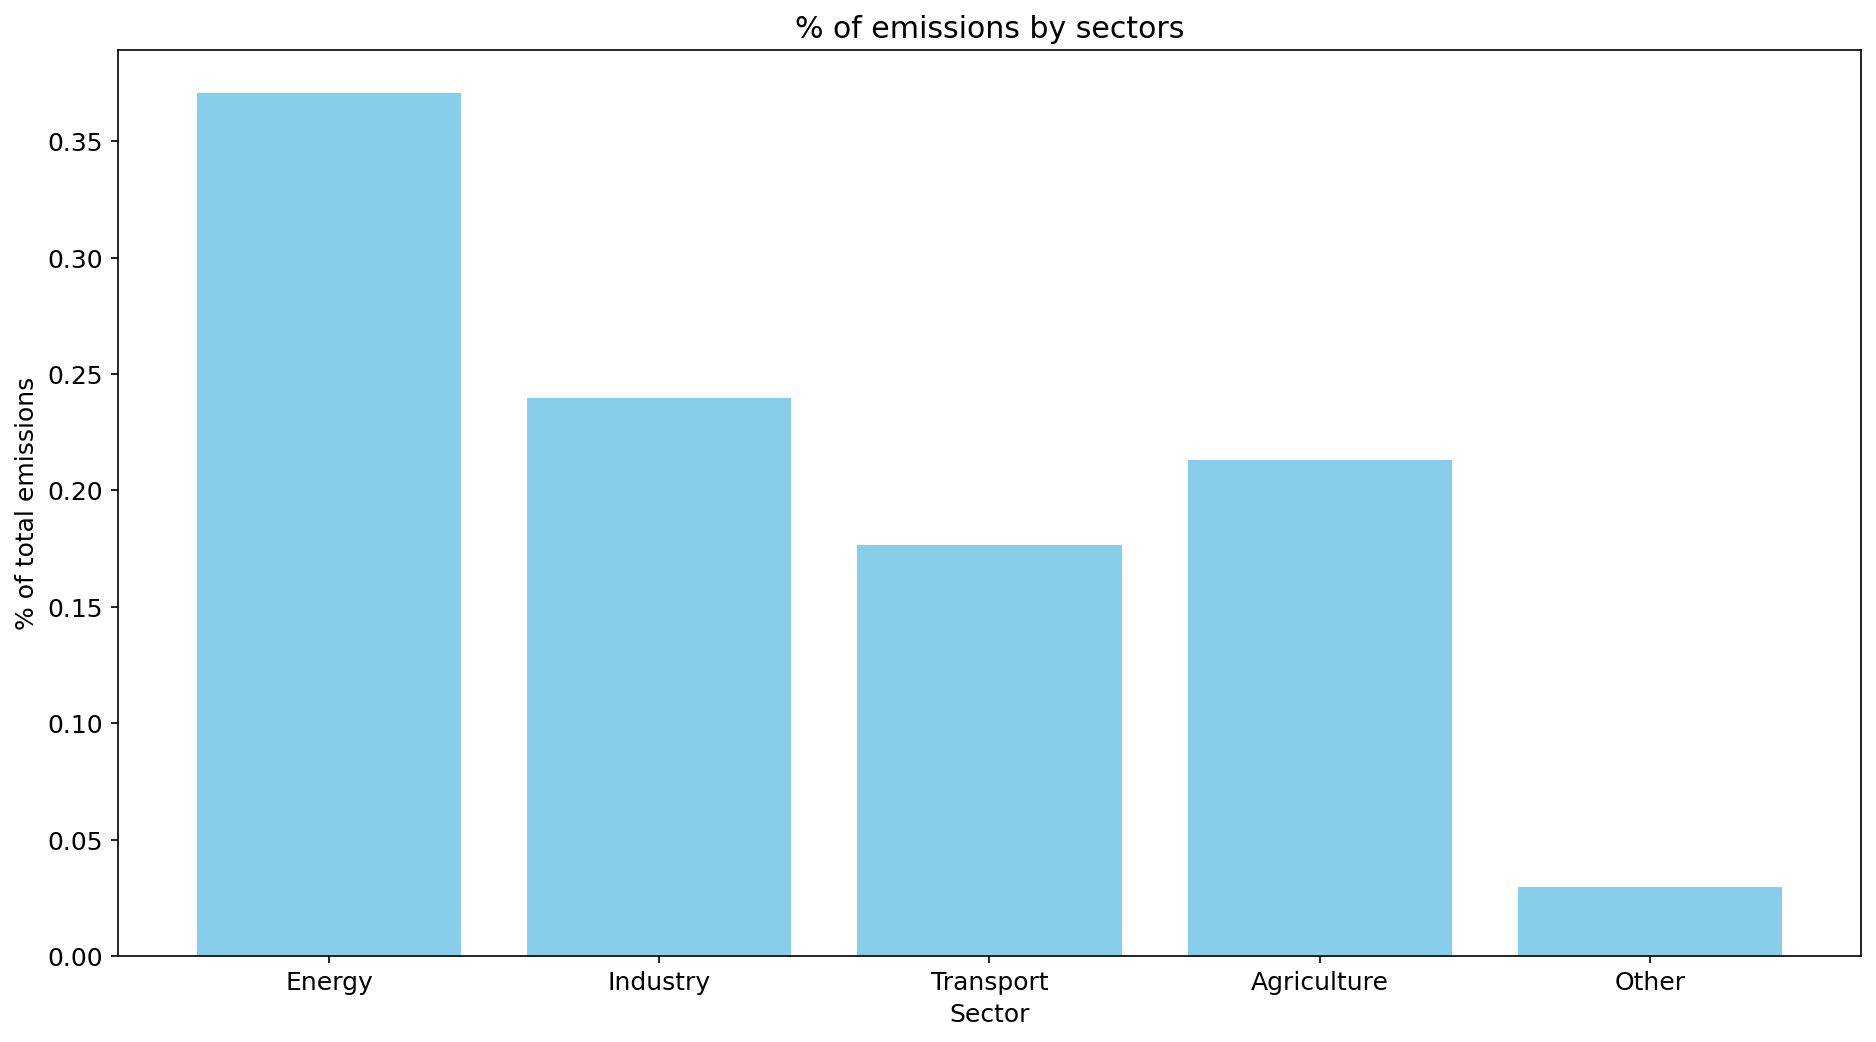

In [26]:
fig = plt.figure(figsize=(15, 8), dpi=150)
plt.title("% of emissions by sectors")
plt.xlabel("Sector")
plt.ylabel("% of total emissions")
plt.bar(x = ['Energy', 'Industry', 'Transport', 'Agriculture', 'Other'], height = [energy_p, industry_p, transport_p, agriculture_p, other_p], color = "skyblue")

## Part ...: Food emissions

We would like to show the kg of Co2 equivalent per kg of food, to compare different kind of food.

In [63]:
food_emissions = pd.read_csv("./datasets/GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv")

In [64]:
food_emissions.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Unnamed: 8
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,NaN
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,NaN


We now sum the different parts to obtain one value per food, to keep the analysis and future visualization simple.

In [41]:
food_emissions_clean = food_emissions.drop(['Unnamed: 8'], axis=1)
food_emissions_clean['Total'] = food_emissions_clean['Land use change'] + food_emissions_clean['Animal Feed'] + food_emissions_clean['Farm'] + food_emissions_clean['Processing'] + food_emissions_clean['Transport'] + food_emissions_clean['Packging'] + food_emissions_clean['Retail']
food_emissions_clean = food_emissions_clean[['Food product', 'Total']]

In [43]:
food_emissions_clean.head()

,Food product,Total
0,Wheat & Rye (Bread),1.4
1,Maize (Meal),1.1
2,Barley (Beer),1.1
3,Oatmeal,1.6
4,Rice,4.0


Let's now have a look at the data sorted, to have a first insight about which food contributes the most to emissions.

In [46]:
food_emissions_sorted = food_emissions_clean.sort_values(['Total'], ascending = False)
food_emissions_sorted.head(10)

,Food product,Total
33,Beef (beef herd),59.6
35,Lamb & Mutton,24.5
39,Cheese,21.2
34,Beef (dairy herd),21.1
32,Dark Chocolate,18.7
31,Coffee,16.5
42,Shrimps (farmed),11.8
16,Palm Oil,7.6
36,Pig Meat,7.2
37,Poultry Meat,6.1


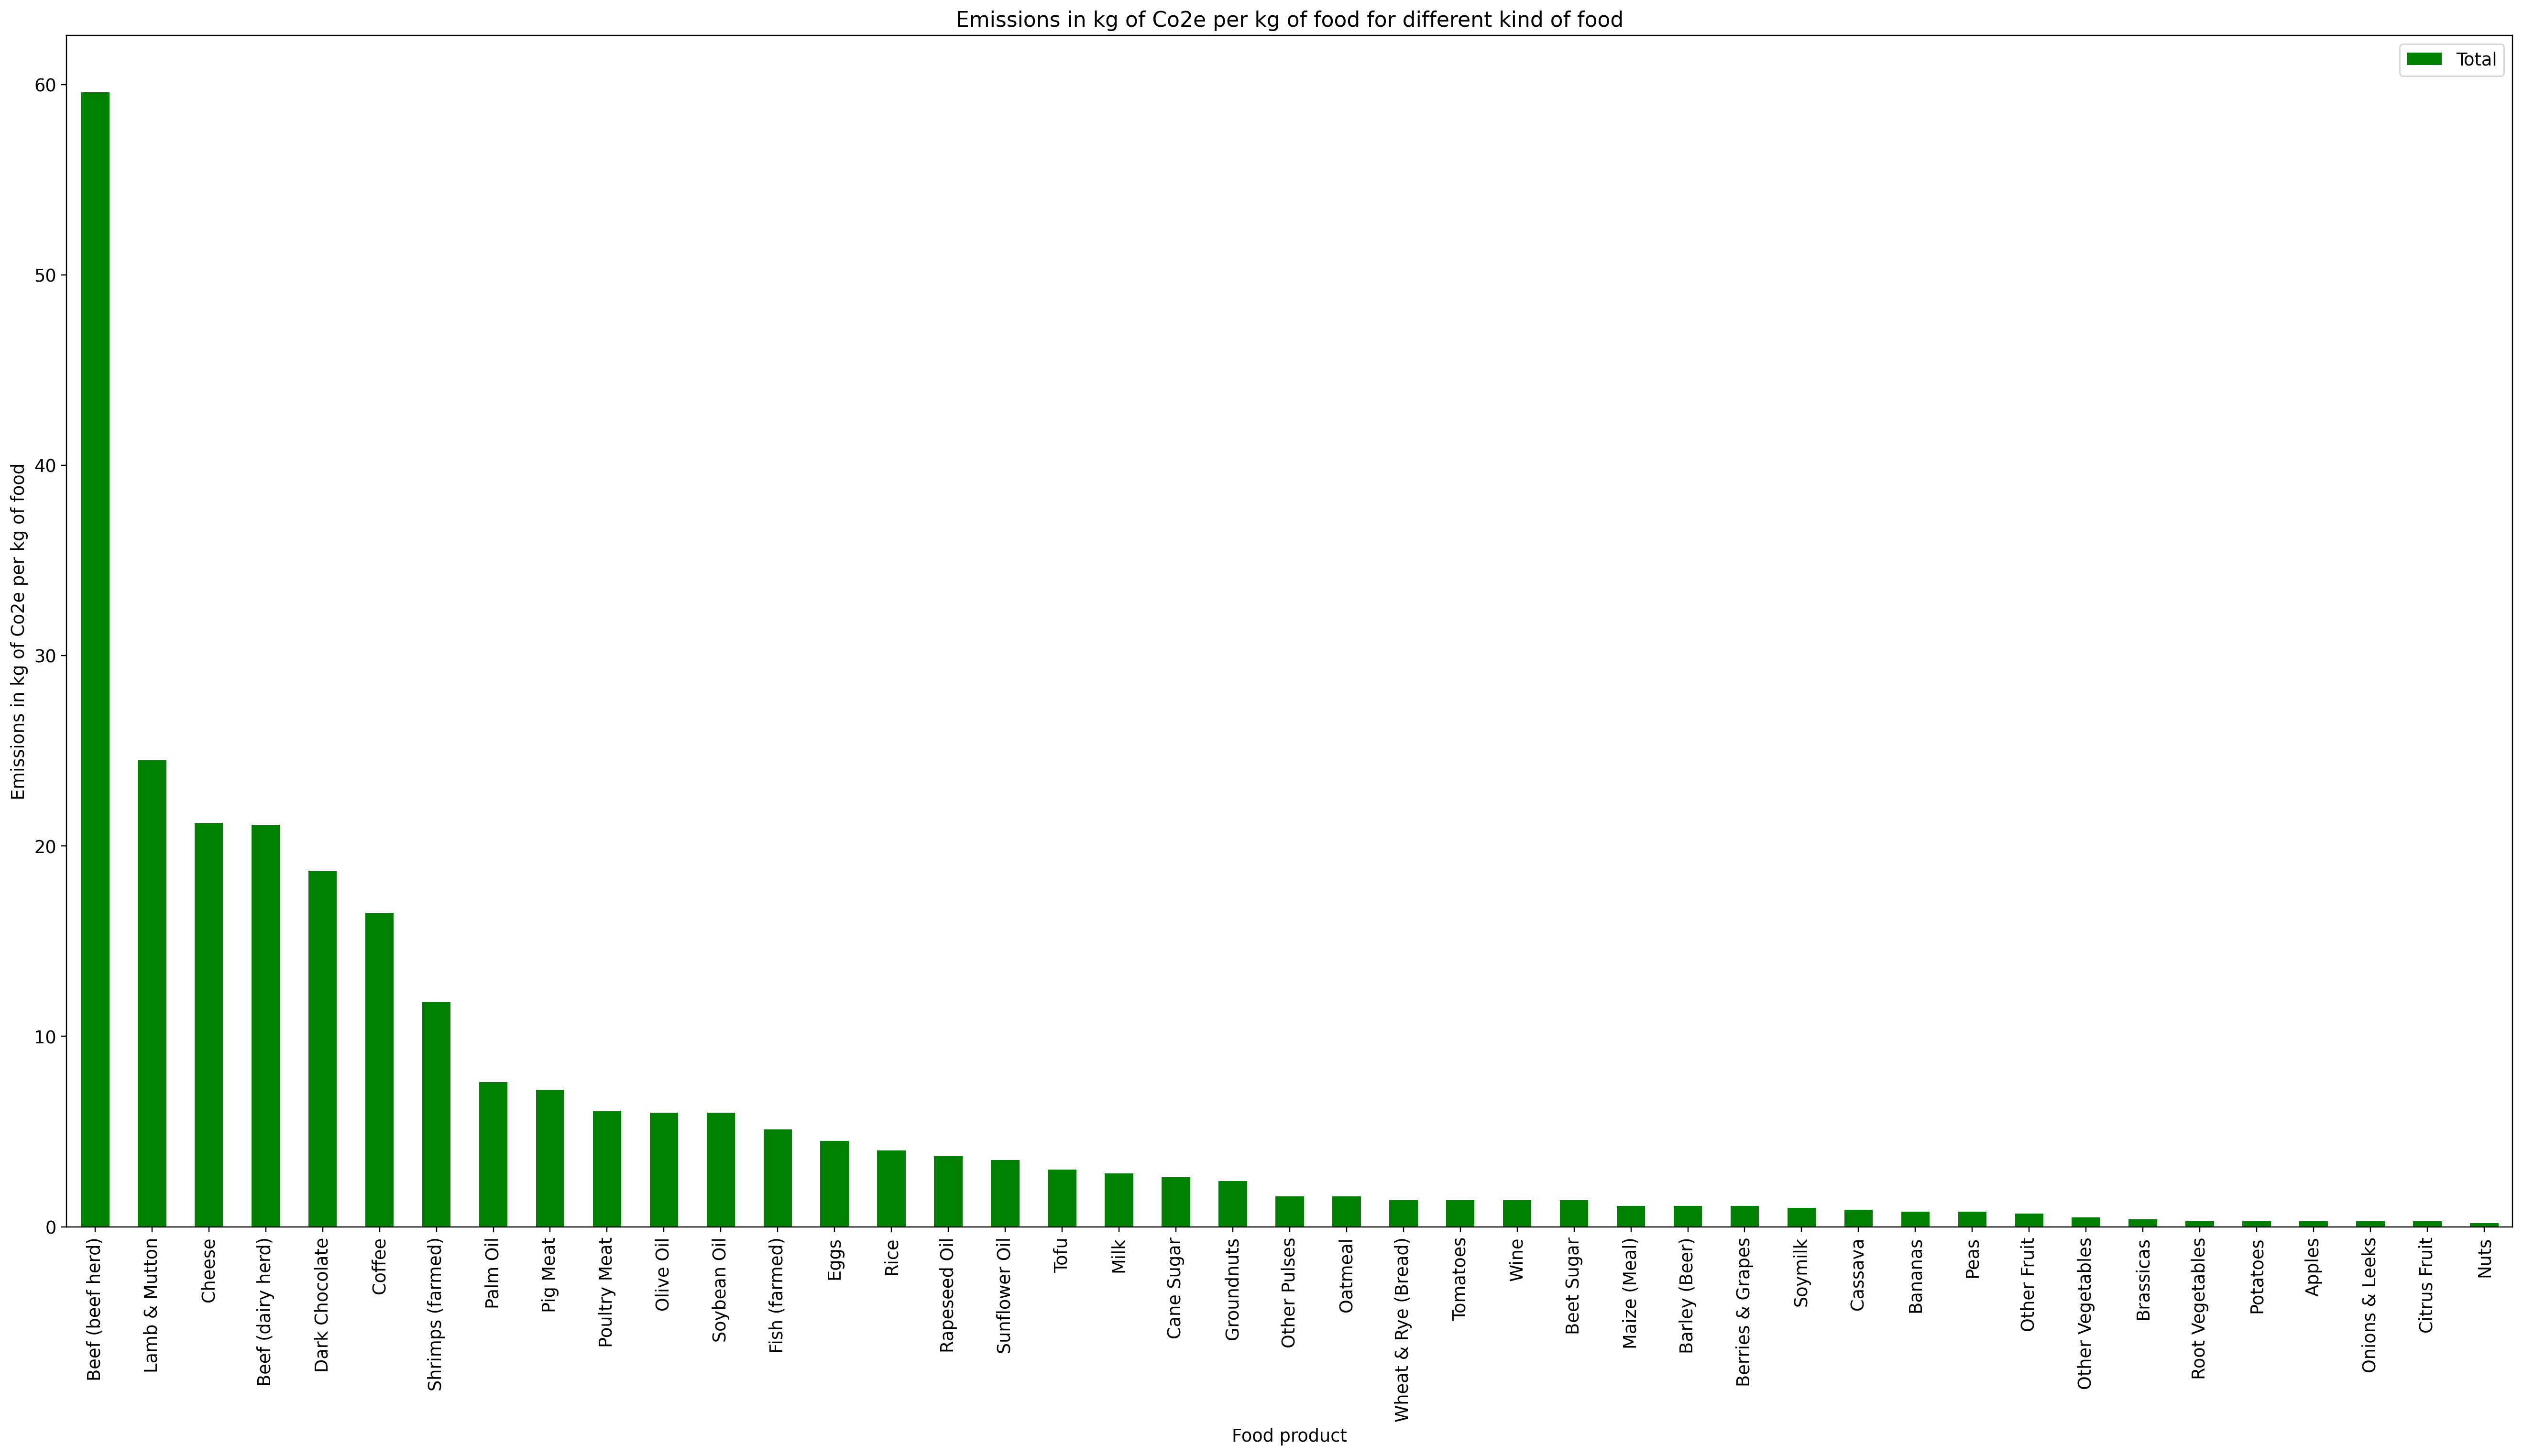

In [51]:
fig = plt.figure(dpi=220)
plt.title("Emissions in kg of Co2e per kg of food for different kind of food")
plt.rcParams.update({'font.size': 12})
plt.ylabel("Emissions in kg of Co2e per kg of food")
ax = food_emissions_sorted.plot.bar(x = 'Food product', y ='Total', rot = 90, figsize=(30,15), ax = plt.gca(), color = "green")

## Part ..: Transports emissions 

In [65]:
with open("./datasets/transport-sector-co2-emissions-by-mode-in-the-sustainable-development-scenario-2000-2030.csv") as file_in:
    for line in file_in:
        print(line)

Source: IEA. All Rights Reserved

This data is subject to the IEA's terms and conditions: https://www.iea.org/t_c/termsandconditions/

Units: Gt

, Passenger road vehicles, Aviation, Road freight vehicles, Rail, Shipping, Other

2000,2.535501062,0.673749567,1.701686311,0.085600505,0.621249198,0.139543496

2001,2.587838249,0.656728212,1.721470782,0.082290771,0.596997808,0.143456962

2002,2.66557415,0.663804395,1.755210699,0.084139638,0.613686425,0.145447897

2003,2.75751036,0.660148859,1.772868341,0.086941279,0.633882046,0.150451083

2004,2.844065952,0.702584889,1.858302154,0.093784072,0.681737737,0.15816784

2005,2.875399451,0.72925171,1.899517718,0.099882774,0.704680259,0.164452214

2006,2.918504821,0.73742329,1.945958035,0.10457344,0.751052603,0.161973195

2007,2.99094962,0.756079475,2.014080125,0.104101185,0.789985428,0.171959087

2008,3.007970886,0.747582737,2.033957807,0.095429102,0.77774516,0.172904743

2009,3.01349685,0.708205814,1.99761053,0.082710221,0.751354074,0.148708014

2

We are only only interested in recent data (2020). We can manually extract this data as the file is not well formatted, and we only need few data points.
As it is expressed in giga tons of Co2 emissions, we will multiply it by 1000 to obtain million tons of Co2, to use the same metric as our first data set.

In [56]:
categories = ["Passenger road vehicles", "Aviation", "Road freight vehicles", "Rail", "Shipping", "Other"]
emissions_2020 = [val * 1000 for val in [3.642846903,0.937136163,2.406415817,0.077868138,0.857857156,0.173978469]]

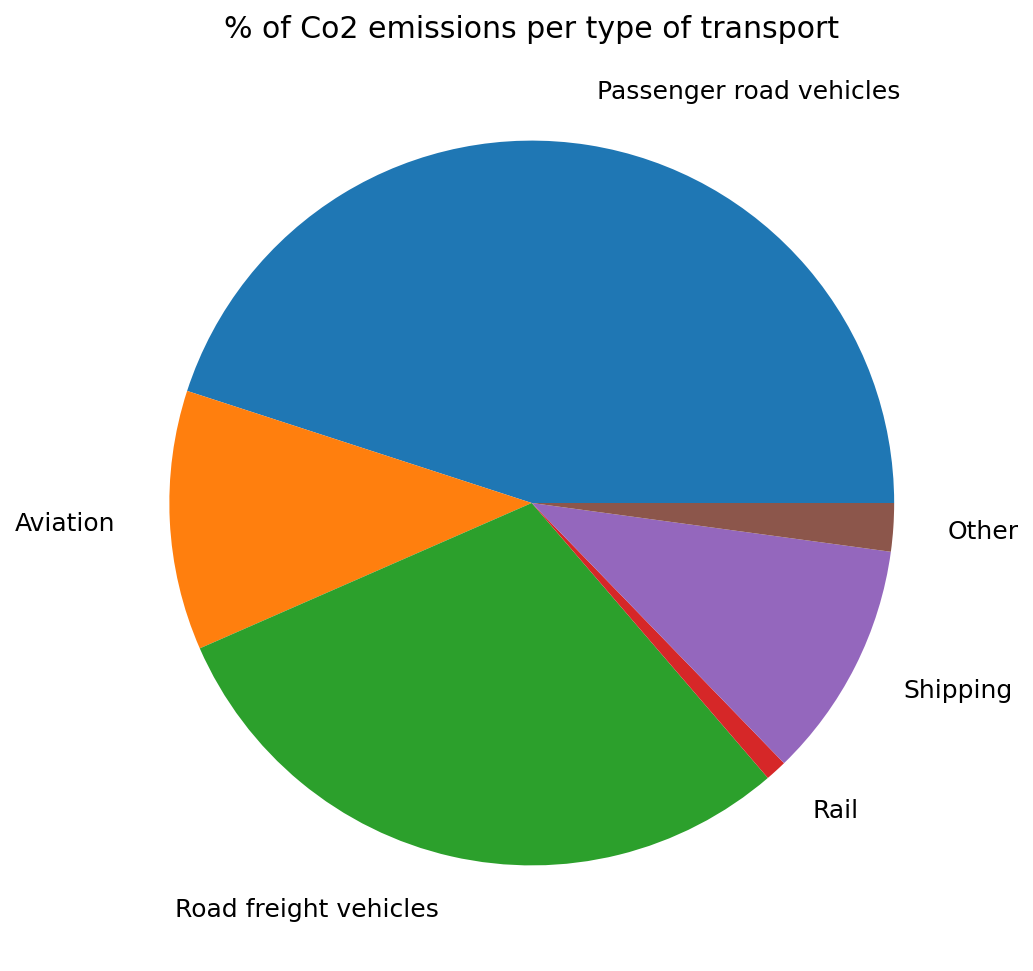

In [60]:
fig = plt.figure(figsize=(8, 8), dpi=150)
plt.title("% of Co2 emissions per type of transport")
plt.pie(emissions_2020, labels=categories, labeldistance=1.15);
plt.show();